## Using an Intake Catalog to analyse data

There are two ways you might want to access & use an Intake Catalog:
1. You want to open a *datastore* for an experiment - and you know where it is.
2. You want to *search for and access a catalog* - from the ACCESS-NRI Intake Catalog.

#### These two workflows will both lead you to the same data format: an xarray dataset.

This tutorial demonstrates how to access the data you're after in either of these scenarios.
___
*This notebook was originally run on a large ARE instance. 


In [1]:
# For now, we only need to import intake.
import intake

## Case 1: Opening a datastore when you know where the experiment data is.

In [2]:
# We've picked a demo experiment name here. You can find all available experiments in the standard catalog by calling `intake.cat.access_nri`.
demo_datastore_path = "/home/189/ct1163/catalog_demo/demo_datastore.json"

esm_ds = intake.open_esm_datastore(demo_datastore_path,
                                   columns_with_iterables=[
                                       'variable',  # We need to tell the datastore that the variable_column contains iterables or it won't work correctly. 
                                       'variable_long_name', # In fact, all the variable_* columns contain iterables - but we're just going to search for names
                                       'variable_standard_name',
                                   ]
)

# Note: We call this esm_ds as this object is an `esm_datastore`: see https://intake-esm.readthedocs.io/en/v2021.8.17/user-guide/overview.html#loading-a-catalog for more details
esm_ds

,unique
filename,2853
file_id,48
path,4128
filename_timestamp,430
frequency,4
start_date,174
end_date,173
variable,116
variable_long_name,112
variable_standard_name,8


In [3]:
# Now, if we wanted to subset and load some data, we could with, for example...
first_result = esm_ds.df.head(1).path
esm_ds.search(path=first_result).to_dask()

<xarray.Dataset> Size: 2GB
Dimensions:      (time: 365, d2: 2, nj: 300, ni: 360, nc: 5)
Coordinates:
  * time         (time) datetime64[ns] 3kB 2015-01-02 2015-01-03 ... 2016-01-01
    TLON         (nj, ni) float32 432kB dask.array<chunksize=(150, 180), meta=np.ndarray>
    TLAT         (nj, ni) float32 432kB dask.array<chunksize=(150, 180), meta=np.ndarray>
    ULON         (nj, ni) float32 432kB dask.array<chunksize=(150, 180), meta=np.ndarray>
    ULAT         (nj, ni) float32 432kB dask.array<chunksize=(150, 180), meta=np.ndarray>
Dimensions without coordinates: d2, nj, ni, nc
Data variables: (12/24)
    time_bounds  (time, d2) datetime64[ns] 6kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    NCAT         (nc) float32 20B dask.array<chunksize=(5,), meta=np.ndarray>
    tmask        (nj, ni) float32 432kB dask.array<chunksize=(150, 180), meta=np.ndarray>
    blkmask      (nj, ni) float32 432kB dask.array<chunksize=(150, 180), meta=np.ndarray>
    tarea        (nj, ni) float32 432kB dask.array<chunksize=(150, 180), meta=np.ndarray>
    dxt          (nj, ni) float32 432kB dask.array<chunksize=(150, 180), meta=np.ndarray>
    ...           ...
    algal_N      (time, nj, ni) float32 158MB dask.array<chunksize=(1, 150, 180), meta=np.ndarray>
    skl_Nit      (time, nj, ni) float32 158MB dask.array<chunksize=(1, 150, 180), meta=np.ndarray>
    ml_Nit       (time, nj, ni) float32 158MB dask.array<chunksize=(1, 150, 180), meta=np.ndarray>
    fNO_ai       (time, nj, ni) float32 158MB dask.array<chunksize=(1, 150, 180), meta=np.ndarray>
    fN_ai        (time, nj, ni) float32 158MB dask.array<chunksize=(1, 150, 180), meta=np.ndarray>
    PP_net       (time, nj, ni) float32 158MB dask.array<chunksize=(1, 150, 180), meta=np.ndarray>
Attributes: (12/27)
    title:                                    sea ice model output for CICE
    contents:                                 Diagnostic and Prognostic Varia...
    source:                                   Los Alamos Sea Ice Model (CICE)...
    time_period_freq:                         day_1
    comment:                                  This year has 365 days
    comment2:                                 File written on model date 2015...
    ...                                       ...
    intake_esm_attrs:variable_standard_name:  ,,,,,,,,,,,,,,,,,,,,,,,,,,,,
    intake_esm_attrs:variable_cell_methods:   ['', '', '', '', '', '', '', ''...
    intake_esm_attrs:variable_units:          ['days since 2015-01-01 00:00:0...
    intake_esm_attrs:realm:                   seaIce
    intake_esm_attrs:_data_format_:           netcdf
    intake_esm_dataset_key:                   iceh_XXX_daily.1day

## Case 2: Search for and access a datastore - from the ACCESS-NRI Intake Catalog.

In [4]:
# We imported intake above. To get the ACCESS-NRI Intake catalog, we use the following line:
access_nri_catalog = intake.cat.access_nri

In [5]:
# We've picked a demo experiment name here. You can find all available experiments in the standard catalog by calling `intake.cat.access_nri`.
experiment_name='01deg_jra55v13_ryf9091'

cat = intake.cat.access_nri
esm_ds = cat[experiment_name]

# Note: Again, we call this esm_ds as this object is an `esm_datastore`: see https://intake-esm.readthedocs.io/en/v2021.8.17/user-guide/overview.html#loading-a-catalog for more details

# Once we have our esm datastore, we can interact with it the same way we did above.

esm_ds

,unique
path,11947
realm,2
variable,178
frequency,5
start_date,3361
end_date,3360
variable_long_name,181
variable_standard_name,36
variable_cell_methods,3
variable_units,50


In [6]:
# Now, if we wanted to subset and load some data, we could with, for example...
first_result = esm_ds.df.head(1).path
esm_ds.search(path=first_result).to_dask()

<xarray.Dataset> Size: 3GB
Dimensions:       (time: 1, d2: 2, nj: 2700, ni: 3600, nc: 5)
Coordinates:
  * time          (time) object 8B 1900-02-01 00:00:00
    TLON          (nj, ni) float32 39MB dask.array<chunksize=(675, 900), meta=np.ndarray>
    TLAT          (nj, ni) float32 39MB dask.array<chunksize=(675, 900), meta=np.ndarray>
    ULON          (nj, ni) float32 39MB dask.array<chunksize=(675, 900), meta=np.ndarray>
    ULAT          (nj, ni) float32 39MB dask.array<chunksize=(675, 900), meta=np.ndarray>
    NCAT          (nc) float32 20B dask.array<chunksize=(5,), meta=np.ndarray>
Dimensions without coordinates: d2, nj, ni, nc
Data variables: (12/49)
    time_bounds   (time, d2) object 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
    tmask         (nj, ni) float32 39MB dask.array<chunksize=(675, 900), meta=np.ndarray>
    blkmask       (nj, ni) float32 39MB dask.array<chunksize=(675, 900), meta=np.ndarray>
    tarea         (nj, ni) float32 39MB dask.array<chunksize=(675, 900), meta=np.ndarray>
    uarea         (nj, ni) float32 39MB dask.array<chunksize=(675, 900), meta=np.ndarray>
    dxt           (nj, ni) float32 39MB dask.array<chunksize=(675, 900), meta=np.ndarray>
    ...            ...
    fmeltt_ai_m   (time, nj, ni) float32 39MB dask.array<chunksize=(1, 675, 900), meta=np.ndarray>
    opening_m     (time, nj, ni) float32 39MB dask.array<chunksize=(1, 675, 900), meta=np.ndarray>
    aicen_m       (time, nc, nj, ni) float32 194MB dask.array<chunksize=(1, 1, 675, 900), meta=np.ndarray>
    vicen_m       (time, nc, nj, ni) float32 194MB dask.array<chunksize=(1, 1, 675, 900), meta=np.ndarray>
    fmelttn_ai_m  (time, nc, nj, ni) float32 194MB dask.array<chunksize=(1, 1, 675, 900), meta=np.ndarray>
    flatn_ai_m    (time, nc, nj, ni) float32 194MB dask.array<chunksize=(1, 1, 675, 900), meta=np.ndarray>
Attributes: (12/24)
    title:                                    sea ice model output for CICE
    contents:                                 Diagnostic and Prognostic Varia...
    source:                                   Los Alamos Sea Ice Model (CICE)...
    comment:                                  This Year Has 365 days
    comment2:                                 File written on model date 1900...
    comment3:                                 seconds elapsed into model date...
    ...                                       ...
    intake_esm_attrs:variable_cell_methods:   ,,,,,,,,,,,,,,,,,,time: mean,ti...
    intake_esm_attrs:variable_units:          days since 1900-01-01 00:00:00,...
    intake_esm_attrs:filename:                iceh.1900-01.nc
    intake_esm_attrs:file_id:                 iceh_XXXX_XX
    intake_esm_attrs:_data_format_:           netcdf
    intake_esm_dataset_key:                   iceh_XXXX_XX.1mon

___
# Using a Datastore - applies to datastores from 1. & 2. 
___

## Searching a datastore

ESM Datastores contain a lot of useful information that lets us search for the data we're after, before we load it into dask/xarray. Lets look at some examples.

In [7]:
# Now, we import the Dask client, so we can get a bit more control over loadign variables
from dask.distributed import Client
client = Client(threads_per_worker=1)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 7,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43579,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 7
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:33687,Total threads: 1
Dashboard: /proxy/46001/status,Memory: 4.57 GiB
Nanny: tcp://127.0.0.1:46467,


In [9]:
esm_ds

,unique
path,11947
realm,2
variable,178
frequency,5
start_date,3361
end_date,3360
variable_long_name,181
variable_standard_name,36
variable_cell_methods,3
variable_units,50


We can see that we have a number of different fields in our esm datastore:
- filename
- file id
- ...
- realm
- derived_variable

Other than `derived_variable`, we can use any of these to search for data. Lets say we are interested in temperature and salinity: lets search for anything where `variable` contains the string `temp`. 

In [10]:
temp_ds = esm_ds.search(variable='temp')
temp_ds

,unique
path,1593
realm,1
variable,29
frequency,4
start_date,1403
end_date,1404
variable_long_name,29
variable_standard_name,11
variable_cell_methods,2
variable_units,16


This gives us 5 datasets, with 4 frequencies. We can load them all at once with `.to_dataset_dict()`.

We won't run the cell below - it uses an awful lot of memory.

In [ ]:
temp_ds.to_dataset_dict()

-> The keys in the returned dictionary of datasets are constructed as follows:
	'file_id.frequency'

 60.00% [3/5 00:37<00:25]

We can see from the ways that the keys have been constructed (`file_id.frequency`) that we should be able to get a single dataset if we pick out the right combination of file_id and frequency. 

Lets do that.

In [11]:
# We can search in a couple of ways - by chaining searches, or one at a time.
temp_ds_chained = esm_ds.search(variable='temp').search(frequency='3mon')
temp_ds_one_search = esm_ds.search(variable='temp',frequency='3mon')

# We can also search for multiple queries at once: eg.

temp_salt_ds = esm_ds.search(variable=['temp','salt'],frequency='3mon')
# or
temp_ds_multifreq = esm_ds.search(variable='temp',frequency=['1mon','3mon'])
# or even (the following two are equivalent)
temp_salt_ds_multifreq = esm_ds.search(variable=['temp','salt'],frequency=['1mon','3mon'])
temp_salt_ds_multifreq = esm_ds.search(variable=['temp','salt']).search(frequency=['1mon','3mon'])

# We can search for any combination of the fields in our esm datastore
# and if we want to search for multiple possible variables/frequencies/ dates, etc etc, we can use lists.

# We can also use regular expressions (regex's) to search for patterns: eg
temp_ds_1990s = esm_ds.search(variable='temp',start_date='199.*')

In [12]:
# We can turn our datastore into a pandas dataframe to look at it in more detail with the .df method:
temp_ds_1990s.df.head(3)
# This confirms that we have the dates we wanted. 

,path,realm,variable,frequency,start_date,end_date,variable_long_name,variable_standard_name,variable_cell_methods,variable_units,filename,file_id
0,/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091/output356/ocean/ocean.nc,ocean,"[temp, pot_temp, salt, age_global, u, v, wt, dzt, pot_rho_2, pot_rho_0, tx_trans, ty_trans, ty_trans_submeso, tx_trans_rho, ty_trans_rho, ty_trans_nrho_submeso, temp_xflux_adv, temp_yflux_adv, buo...",1mon,"1990-01-01, 00:00:00","1990-04-01, 00:00:00","[Conservative temperature, Potential temperature, Practical Salinity, Age (global), i-current, j-current, dia-surface velocity T-points, t-cell thickness, potential density referenced to 2000 dbar...","[sea_water_conservative_temperature, sea_water_potential_temperature, sea_water_salinity, sea_water_age_since_surface_contact, sea_water_x_velocity, sea_water_y_velocity, , cell_thickness, , sea_w...","[time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, tim...","[K, K, psu, yr, m/sec, m/sec, m/sec, m, kg/m^3, kg/m^3, kg/s, kg/s, kg/s, kg/s, kg/s, kg/s, Watts, Watts, 1/s^2, 1/sec^3, (kg/m^3)*(m^2/s^2), (kg/m^3)*(m^2/s^2), 1/sec^4, days since 1900-01-01 00:...",ocean.nc,ocean
1,/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091/output357/ocean/ocean.nc,ocean,"[temp, pot_temp, salt, age_global, u, v, wt, dzt, pot_rho_2, pot_rho_0, tx_trans, ty_trans, ty_trans_submeso, tx_trans_rho, ty_trans_rho, ty_trans_nrho_submeso, temp_xflux_adv, temp_yflux_adv, buo...",1mon,"1990-04-01, 00:00:00","1990-07-01, 00:00:00","[Conservative temperature, Potential temperature, Practical Salinity, Age (global), i-current, j-current, dia-surface velocity T-points, t-cell thickness, potential density referenced to 2000 dbar...","[sea_water_conservative_temperature, sea_water_potential_temperature, sea_water_salinity, sea_water_age_since_surface_contact, sea_water_x_velocity, sea_water_y_velocity, , cell_thickness, , sea_w...","[time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, tim...","[K, K, psu, yr, m/sec, m/sec, m/sec, m, kg/m^3, kg/m^3, kg/s, kg/s, kg/s, kg/s, kg/s, kg/s, Watts, Watts, 1/s^2, 1/sec^3, (kg/m^3)*(m^2/s^2), (kg/m^3)*(m^2/s^2), 1/sec^4, days since 1900-01-01 00:...",ocean.nc,ocean
2,/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091/output358/ocean/ocean.nc,ocean,"[temp, pot_temp, salt, age_global, u, v, wt, dzt, pot_rho_2, pot_rho_0, tx_trans, ty_trans, ty_trans_submeso, tx_trans_rho, ty_trans_rho, ty_trans_nrho_submeso, temp_xflux_adv, temp_yflux_adv, buo...",1mon,"1990-07-01, 00:00:00","1990-10-01, 00:00:00","[Conservative temperature, Potential temperature, Practical Salinity, Age (global), i-current, j-current, dia-surface velocity T-points, t-cell thickness, potential density referenced to 2000 dbar...","[sea_water_conservative_temperature, sea_water_potential_temperature, sea_water_salinity, sea_water_age_since_surface_contact, sea_water_x_velocity, sea_water_y_velocity, , cell_thickness, , sea_w...","[time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, time: mean, tim...","[K, K, psu, yr, m/sec, m/sec, m/sec, m, kg/m^3, kg/m^3, kg/s, kg/s, kg/s, kg/s, kg/s, kg/s, Watts, Watts, 1/s^2, 1/sec^3, (kg/m^3)*(m^2/s^2), (kg/m^3)*(m^2/s^2), 1/sec^4, days since 1900-01-01 00:...",ocean.nc,ocean


In [13]:
#  It turns out this only gives us one dataset, with 196 files - lets load it and take a look.
temp_ds_1990s

,unique
path,40
realm,1
variable,27
frequency,1
start_date,40
end_date,40
variable_long_name,27
variable_standard_name,11
variable_cell_methods,2
variable_units,14


In [14]:
# If we have one dataset in our search results, we can use `.to_dask()` on our dataset to load it.
temp_ds_1990s.to_dask()

<xarray.Dataset> Size: 350GB
Dimensions:   (time: 120, st_ocean: 75, yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
  * xt_ocean  (xt_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 22kB -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
  * st_ocean  (st_ocean) float64 600B 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * time      (time) object 960B 1990-01-16 12:00:00 ... 1999-12-16 12:00:00
Data variables:
    temp      (time, st_ocean, yt_ocean, xt_ocean) float32 350GB dask.array<chunksize=(1, 7, 300, 400), meta=np.ndarray>
Attributes: (12/16)
    filename:                                 ocean.nc
    title:                                    ACCESS-OM2-01
    grid_type:                                mosaic
    grid_tile:                                1
    intake_esm_vars:                          ['temp']
    intake_esm_attrs:realm:                   ocean
    ...                                       ...
    intake_esm_attrs:variable_cell_methods:   time: mean,time: mean,time: mea...
    intake_esm_attrs:variable_units:          K,K,psu,yr,m/sec,m/sec,m/sec,m,...
    intake_esm_attrs:filename:                ocean.nc
    intake_esm_attrs:file_id:                 ocean
    intake_esm_attrs:_data_format_:           netcdf
    intake_esm_dataset_key:                   ocean.1mon

If we look at this output, we an see that our entire array is 235 GiB, but we have 688 'chunks', each of which are 2.57 MiB. This means that when we load our dataset, dask will have to combine 106920 __very small__ chunks. Things would be much faster if it didn't have to do that: so lets tell dask the chunks we want to use.

This is also the cause of the warnings above (NB. lots of them have been cleared for readability)

___
### What is a Chunk?

Dask is designed to handle *distributed* datasets. What this means is essentially it can load lots of files (more than would fit in memory), operate on them separately, and then combine them all later to get a result that fits in memory. 

In this instance, our chunks are way smaller than they need to be - and this is inefficient 


In [15]:
# We have 120 files - one for each time step. Because we have lots of data in the x & y dimensions, we will
# still need to split them up on these
# Luckily, we can pass `.to_dask()` a chunk specification - and make sure we get sensible sized chunks.

# As a rule of thumb, 300MiB chunks are a good target.

chunk_spec = {
    # 'time' : 120, We dont need to pass a time chunk - it defaults to one per file anyway - but this is how we would tell it to.
    'st_ocean' : -1, # We can also use -1 to mean '1 chunk for the whole dimension - we could have done this for time too & it would be the exact same.
    'yt_ocean' : 900, 
    'xt_ocean': 1200
    
}

temp_ds_1990s.to_dask(
        xarray_open_kwargs = {'chunks': chunk_spec} 
)


<xarray.Dataset> Size: 350GB
Dimensions:   (time: 120, st_ocean: 75, yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
  * xt_ocean  (xt_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 22kB -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
  * st_ocean  (st_ocean) float64 600B 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * time      (time) object 960B 1990-01-16 12:00:00 ... 1999-12-16 12:00:00
Data variables:
    temp      (time, st_ocean, yt_ocean, xt_ocean) float32 350GB dask.array<chunksize=(1, 75, 900, 1200), meta=np.ndarray>
Attributes: (12/16)
    filename:                                 ocean.nc
    title:                                    ACCESS-OM2-01
    grid_type:                                mosaic
    grid_tile:                                1
    intake_esm_vars:                          ['temp']
    intake_esm_attrs:realm:                   ocean
    ...                                       ...
    intake_esm_attrs:variable_cell_methods:   time: mean,time: mean,time: mea...
    intake_esm_attrs:variable_units:          K,K,psu,yr,m/sec,m/sec,m/sec,m,...
    intake_esm_attrs:filename:                ocean.nc
    intake_esm_attrs:file_id:                 ocean
    intake_esm_attrs:_data_format_:           netcdf
    intake_esm_dataset_key:                   ocean.1mon

## Now we have more sensible chunks, we can easily operate on our data. 
### Lets average over time first to get a climatological state, & then plot the zonal mean temperature structure around the Southern Ocean.

This all uses standard xarray operations now, which you are hopefully familiar with.

For a brief intro to xarray, see the excellent notes at https://cmip6moap.github.io/resources/loading-data-xarray/

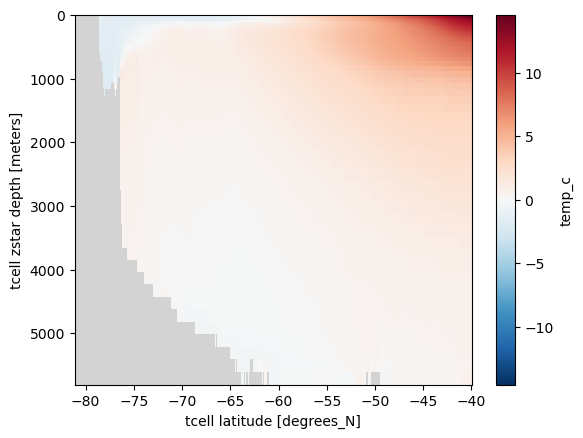

In [22]:
import matplotlib.pyplot as plt

xr_ds = temp_ds_1990s.to_dask(
    xarray_open_kwargs = {'chunks' : chunk_spec}
)

SOU_OCN_DS = xr_ds.sel(yt_ocean=slice(-90,-40))  # Just get south of 40 South

SOU_ZM = SOU_OCN_DS.mean(dim=['time','xt_ocean']) # Average over time & longitude

SOU_ZM['temp_c'] = SOU_ZM['temp'] - 273

# Create the plot
fig, ax = plt.subplots()

SOU_ZM['temp_c'].plot(yincrease=False, ax = ax)

# Set the background color
ax.set_facecolor('lightgrey')

plt.show()

